# Modeling Text Data

Text data available is unstructured data and need to be converted in structured data to apply machine leanring.
This code is to convert the text data from unstructured data to semi-structured data. The Output of this code will be the Term/Document Matrix. 

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.probability import FreqDist
import string
import numpy as np
import pandas as pd

In [4]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

## The NLTK package uses several supporting files. These need to be
## downloaded. 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shirishpandagare/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shirishpandagare/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shirishpandagare/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shirishpandagare/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [19]:
## Read Document( File has been downloaded from http://www.gutenberg.org.)
with open ("41481.txt", "r") as text_file:
    adoc = text_file.read()

## Parse

Parsing a document consists of several important steps
1. Tokenization
2. Mapping Synonyms 
3. Tagging terms with Parts od Speech
4. Entity Extraction

In [10]:
# Tokenization 

## Text must be in lower case and unwanted punctuation shall be 
## removed. 

#Convert to all lower case - required. 
a_discussion = ("%s" %adoc).lower()

#Remove unwanted punctuation
a_discussion = a_discussion.replace("-", " ")
a_discussion = a_discussion.replace("_", " ")
a_discussion = a_discussion.replace(",", " ")
a_discussion = a_discussion.replace("nt", "not")


#### TOKENIZE ####

tokens = word_tokenize(a_discussion)
tokens = [word.replace(',','') for word in tokens]
tokens = [word for word in tokens if('*' not in word) and \
         ("''" != word) and ("``" != word) and\
         (word!='description') and (word !='dtype') \
            and (word != 'object') and (word!="'s")]
print("\n Document contains a total of", len(tokens), "terms.")


 Document contains a total of 84585 terms.


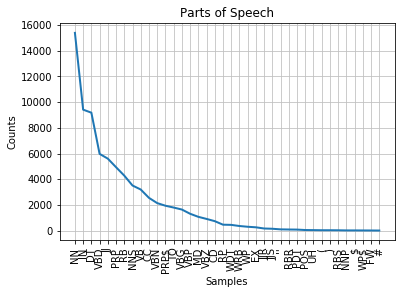

NN             :15395
IN             :9415
DT             :9180
VBD            :5972
JJ             :5600
PRP            :4933
RB             :4278
NNS            :3508
VB             :3196
CC             :2547
VBN            :2138
PRP$           :1934
TO             :1792
VBG            :1637
VBP            :1309
MD             :1069
VBZ            : 906
CD             : 732
RP             : 457
WDT            : 442
WRB            : 354
WP             : 296
EX             : 253
JJR            : 160
JJS            : 140
''             :  93
RBR            :  82
PDT            :  75
POS            :  41
UH             :  34
(              :  25
)              :  25
RBS            :  21
NNP            :  11
$              :  11
WP$            :   8
FW             :   5
#              :   1


In [14]:
# Synonyms and POS Tagging 

# POS Tagging 

tagged_tokens = nltk.pos_tag(tokens)
pos_list = [word[1] for word in tagged_tokens if word[1] != ":" and \
word[1] != "."]
pos_dist = FreqDist(pos_list)
pos_dist.plot(title="Parts of Speech")
for pos, frequency in pos_dist.most_common(pos_dist.N()):
    print('{:<15s}:{:>4d}'.format(pos, frequency))


## Filter 

Parsing produces a list of terms along with their parts of speech and frequency for each document. Filtering include the final two steps:
1. Removing Stop Words
2. Stemming

In [15]:
# Remove stop words
stop = stopwords.words('english') + list(string.punctuation)
stop_tokens = [word for word in tagged_tokens if word[0] not in stop]
# Remove single character words and simple punctuation
stop_tokens = [word for word in stop_tokens if len(word) > 1]
# Remove numbers and possive "'s"
stop_tokens = [word for word in stop_tokens \
if (not word[0].replace('.','',1).isnumeric()) and \
word[0]!="'s" ]
token_dist = FreqDist(stop_tokens)
print("\nCorpus contains", len(token_dist.items()), \
" unique terms after removing stop words.\n")
for word, frequency in token_dist.most_common(20):
    print('{:<15s}:{:>4d}'.format(word[0], frequency))


Corpus contains 10332  unique terms after removing stop words.

one            : 231
said           : 212
could          : 177
n't            : 166
us             : 161
two            : 160
like           : 150
would          : 147
man            : 128
back           : 127
came           : 125
upon           : 116
derek          : 115
time           : 113
see            : 113
eyes           : 108
tommy          : 106
tanks          : 103
feet           :  96
way            :  95


## Lemmatization & Stemming 

In [16]:
# Lemmatization - Stemming with POS
# WordNet Lematization Stems using POS
stemmer = SnowballStemmer("english")
wn_tags = {'N':wn.NOUN, 'J':wn.ADJ, 'V':wn.VERB, 'R':wn.ADV}
wnl = WordNetLemmatizer()
stemmed_tokens = []
for token in stop_tokens:
    term = token[0]
    pos = token[1]
    pos = pos[0]
    try:
        pos = wn_tags[pos]
        stemmed_tokens.append(wnl.lemmatize(term, pos=pos))
    except:
        stemmed_tokens.append(stemmer.stem(term))
# Get token distribution
fdist = FreqDist(stemmed_tokens)
print("\nCorpus contains", len(fdist.items()), \
                        " unique terms after Stemming.\n")


Corpus contains 6506  unique terms after Stemming.



## The Term/Document Matrix

one            : 268
say            : 266
inoto          : 244
come           : 224
see            : 187
get            : 186
tank           : 182
could          : 177
go             : 176
derek          : 173
back           : 170
tommy          : 168
n't            : 166
us             : 161
two            : 160
like           : 160
make           : 151
would          : 147
dodd           : 143
know           : 140


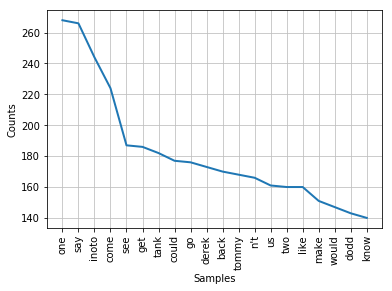

In [18]:
for word, freq in fdist.most_common(20):
    print('{:<15s}:{:>4d}'.format(word, freq))
fdist_top = nltk.probability.FreqDist()
for word, freq in fdist.most_common(20):
    fdist_top[word] = freq
fdist_top.plot()